In [1]:
import os
import spacy
from collections import Counter, defaultdict
from pprint import pprint

from matplotlib import pyplot as plt
import numpy as np

In [45]:
from string import punctuation
punct_list = [c for c in punctuation]
punct_list.append('--')
punct_list.append('...')
punct_list.append('–')

In [49]:
from nltk.corpus import stopwords
ru_stopwords = set(stopwords.words("russian"))
en_stopwords = set(stopwords.words("english"))

ru_stopwords.add('это')
ru_stopwords.add('всё')
ru_stopwords.add('свой')
ru_stopwords.add('ещё')
ru_stopwords.add('весь')

en_stopwords.add("'s")
en_stopwords.add("I")
en_stopwords.add("he")
en_stopwords.add("she")

In [67]:
with open("./corpora/karenina/en_lemmas.txt", "rt", encoding="utf-8") as file:
    en_lemmas = [[word for word in line.rstrip().split()] for line in file]

with open("./corpora/karenina/ru_lemmas.txt", "rt", encoding="utf-8") as file:
    ru_lemmas = [[word for word in line.rstrip().split()] for line in file]

In [68]:
en_lemmas[:5]

[['Anna', 'Karenina'],
 ['Leo', 'Tolstoy'],
 ['Vengeance', 'be', 'mine', ';', 'I', 'will', 'repay', '.'],
 ['volume', 'one', 'part', 'I'],
 ['all',
  'happy',
  'families',
  'resemble',
  'one',
  'another',
  ',',
  'but',
  'each',
  'unhappy',
  'family',
  'be',
  'unhappy',
  'in',
  'its',
  'own',
  'way',
  '.']]

In [64]:
def most_common_lemmas(lemmas, n: int):
    words = []
    for sentence in lemmas:
        for word in sentence:
            if word not in punct_list and word not in ru_stopwords and word not in en_stopwords:
                words.append(word) 
    word_freq = Counter(words)
    return word_freq.most_common(n)

In [43]:
most_common_lemmas(ru_lemmas, 15)

[('сказать', 2767),
 ('левин', 1619),
 ('мочь', 1412),
 ('говорить', 1247),
 ('знать', 1111),
 ('александрович', 772),
 ('анна', 715),
 ('рука', 711),
 ('хотеть', 694),
 ('человек', 677),
 ('кити', 658),
 ('вронский', 657),
 ('видеть', 648),
 ('думать', 643),
 ('алексей', 633)]

In [50]:
most_common_lemmas(en_lemmas, 15)

[('say', 2845),
 ('go', 1696),
 ('Levin', 1510),
 ('one', 1388),
 ('know', 1233),
 ('see', 1220),
 ('come', 1057),
 ('would', 1031),
 ('look', 1000),
 ('think', 976),
 ('well', 929),
 ('could', 885),
 ('Anna', 855),
 ('feel', 836),
 ('Vronsky', 830)]

In [70]:
with open("./corpora/karenina/numerical_alignment/inter.txt", "rt", encoding="utf-8") as file:
    aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

with open("./corpora/karenina/numerical_alignment/itermax.txt", "rt", encoding="utf-8") as file:
    aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

with open("./corpora/karenina/numerical_alignment/mwmf.txt", "rt", encoding="utf-8") as file:
    aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.rstrip().split()] for line in file]

In [60]:
aligned_inter[:4]

[[('0', '0'), ('1', '1')],
 [('0', '1'), ('1', '0')],
 [('0', '1'), ('0', '4'), ('2', '3'), ('4', '5'), ('5', '6')],
 [('1', '2')]]

In [146]:
def plot_variety_pie(variety_dict, other_len: int, original_word: str):
    variety_dict_items = list(variety_dict.items())
    variety_dict_items.sort(key=lambda x: -x[1])
    translations = [x[0] for x in variety_dict_items]
    translations.append("other")
    number_of_matches = [x[1] for x in variety_dict_items]
    number_of_matches.append(other_len)

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)
        
    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(number_of_matches, autopct = lambda pct: func(pct, number_of_matches), labels = translations)

    plt.title(original_word)
    plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

    # show plot
    plt.show()

In [160]:
def get_variety_dict_from_alignment(original_word: str, aligned_text: list, orig_lemmas: list, translated_lemmas: list):
    variety_dict = defaultdict(lambda : 0)
    for i, num_sentence_pairs in enumerate(aligned_text):
        small_dict = defaultdict(lambda : 0)
        phrase = []
        for src_idx, tgt_idx in num_sentence_pairs:
            try:
                if orig_lemmas[i][src_idx] == original_word and \
                    translated_lemmas[i][tgt_idx] not in ru_stopwords \
                        and translated_lemmas[i][tgt_idx] not in en_stopwords \
                            and translated_lemmas[i][tgt_idx] not in punct_list:
                    phrase.append(translated_lemmas[i][tgt_idx])
                    # variety_dict[translated_lemmas[i][tgt_idx]] += 1
            except:
                print(i, src_idx, tgt_idx)
                continue

        if phrase:
            phrase.sort()
            small_dict[' '.join(phrase)] += 1
        
        for phrase, cnt in small_dict.items():
            variety_dict[phrase] += cnt

    return variety_dict

In [167]:
most_common_lemmas(en_lemmas, 20)

[('say', 2845),
 ('go', 1696),
 ('Levin', 1510),
 ('one', 1388),
 ('know', 1233),
 ('see', 1220),
 ('come', 1057),
 ('would', 1031),
 ('look', 1000),
 ('think', 976),
 ('well', 929),
 ('could', 885),
 ('Anna', 855),
 ('feel', 836),
 ('Vronsky', 830),
 ('take', 710),
 ('man', 687),
 ('Kitty', 683),
 ('ask', 657),
 ('hand', 631)]

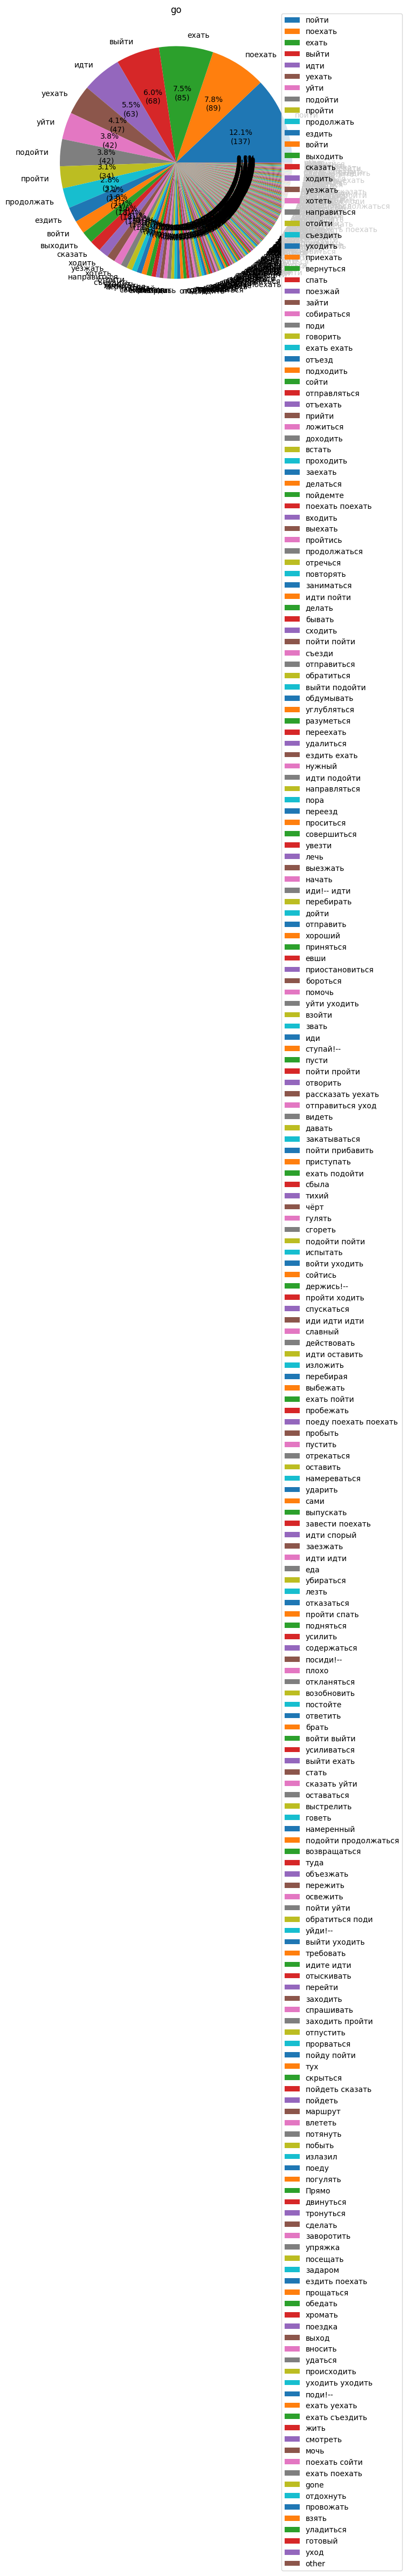

In [172]:
word = "go"
en_aligned_inter = [[(pair[1], pair[0]) for pair in line] for line in aligned_inter]
vardict = get_variety_dict_from_alignment(word, en_aligned_inter, en_lemmas, ru_lemmas)
plot_variety_pie(vardict, 0, word)

In [173]:
vardict = get_variety_dict_from_alignment(word, aligned_mwmf, ru_lemmas, en_lemmas)
plot_variety_pie(vardict, 0, word)

5996 195 202


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1000x700 with 1 Axes>

5996 195 202


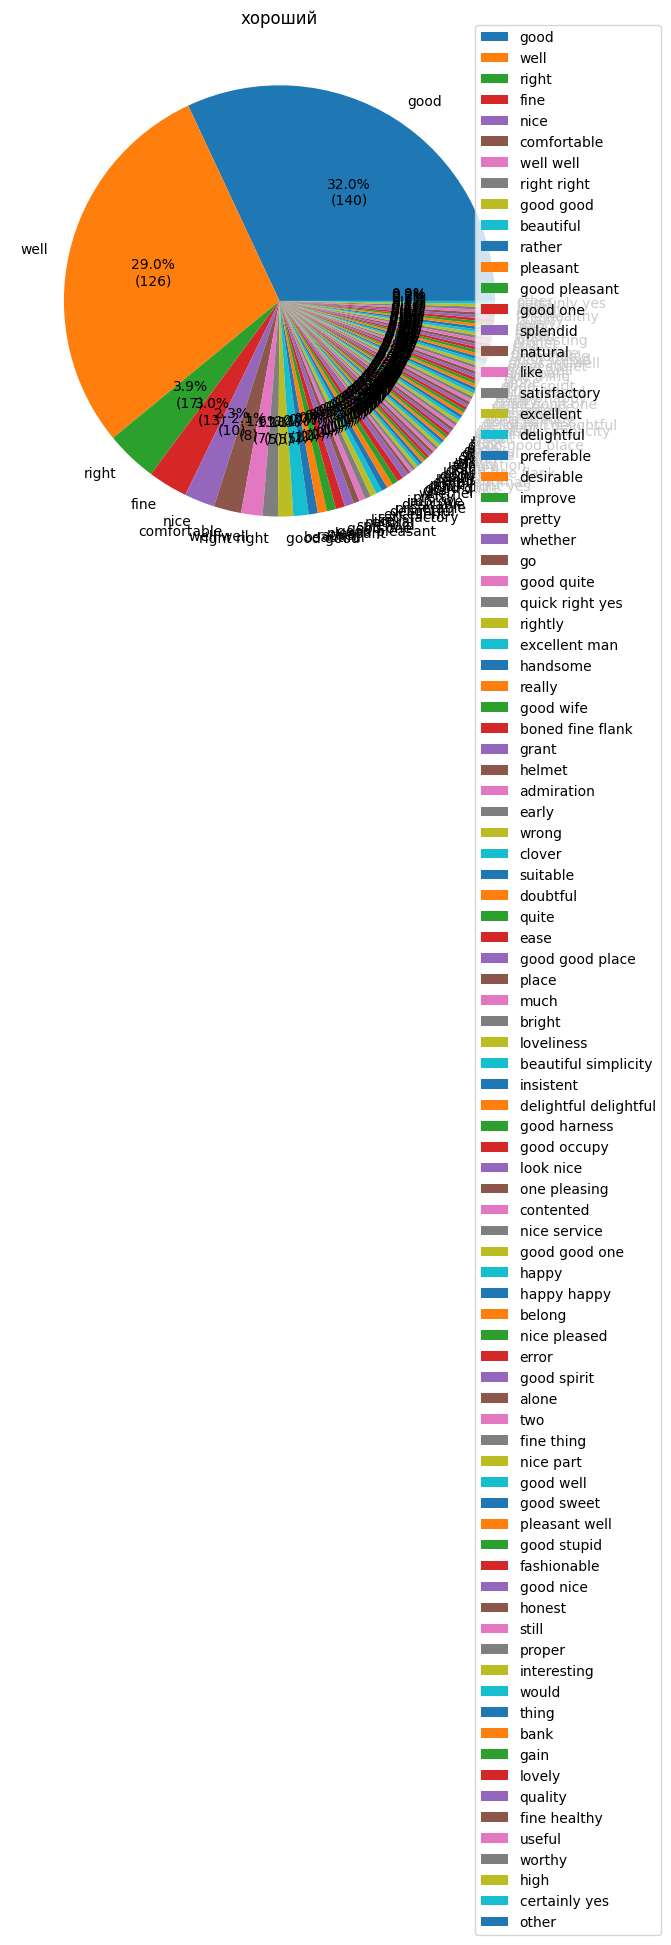

In [152]:
vardict = get_variety_dict_from_alignment(word, aligned_itermax, ru_lemmas, en_lemmas)
plot_variety_pie(vardict, 0, word)

5996 195 202


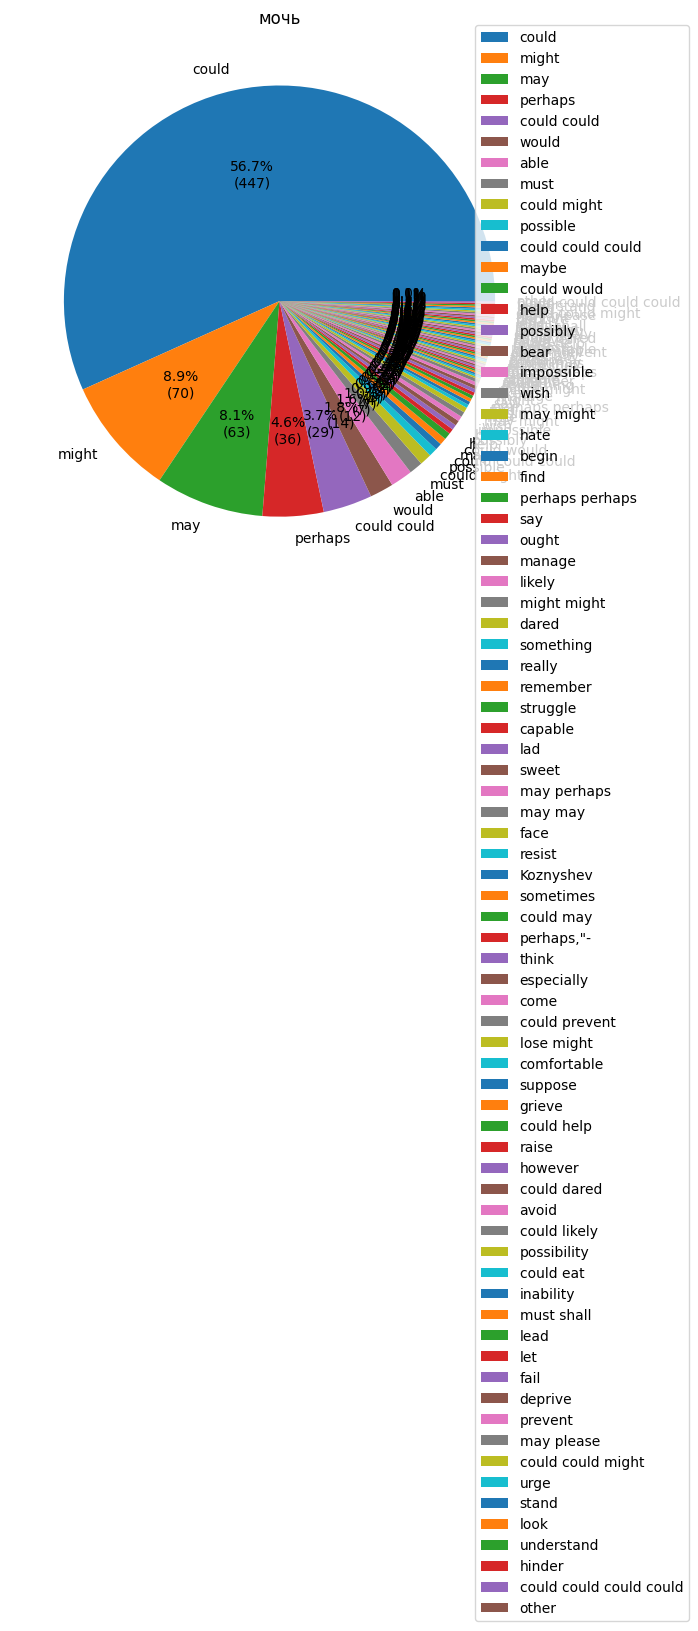